Source
------
http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

Statement
---------
On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).


    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn import datasets, svm
    
    digits = datasets.load_digits()
    X = digits.data
    y = digits.target
    
    svc = svm.SVC(kernel='linear')
    C_s = np.logspace(-10, 0, 10)

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

In [2]:
for C in C_s:
    svc.C = C
    scores = cross_val_score(svc, X, y)
    print("C: %f -> scores: %s (mean: %f)" %(C, scores, scores.mean()))

C: 0.000000 -> scores: [0.1013289  0.10183639 0.26342282] (mean: 0.155529)
C: 0.000000 -> scores: [0.1013289  0.10183639 0.26342282] (mean: 0.155529)
C: 0.000000 -> scores: [0.1013289  0.10183639 0.26342282] (mean: 0.155529)
C: 0.000000 -> scores: [0.1013289  0.10183639 0.26342282] (mean: 0.155529)
C: 0.000003 -> scores: [0.1013289  0.10183639 0.26342282] (mean: 0.155529)
C: 0.000036 -> scores: [0.90697674 0.9015025  0.89932886] (mean: 0.902603)
C: 0.000464 -> scores: [0.95348837 0.96160267 0.9295302 ] (mean: 0.948207)
C: 0.005995 -> scores: [0.93853821 0.95826377 0.93791946] (mean: 0.944907)
C: 0.077426 -> scores: [0.93521595 0.95826377 0.93791946] (mean: 0.943800)
C: 1.000000 -> scores: [0.93521595 0.95826377 0.93791946] (mean: 0.943800)


Correction
----------

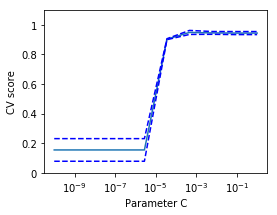

In [3]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

%matplotlib inline
# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

Enhancements
------------

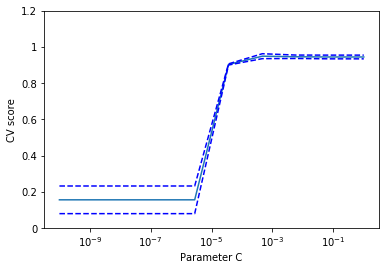

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

means = []
stds = []
for C in C_s:
    svc.C = C
    scores = cross_val_score(svc, X, y)
    means.append(scores.mean())
    stds.append(scores.std())
    
%matplotlib inline
# Do the plotting
import matplotlib.pyplot as plt
plt.clf()
plt.semilogx(C_s, means)
plt.semilogx(C_s, np.array(means) + np.array(stds), 'b--')
plt.semilogx(C_s, np.array(means) - np.array(stds), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.show()